In [1]:
from tifffile import imread
import os
from os.path import exists, join
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Parameters and path

In [2]:
um_per_pixel = 0.117
s_per_frame = 0.03
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/rotation"

img_folder = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/rotation"
os.chdir(img_folder)
lst_imgs = [f for f in os.listdir(img_folder) if f.endswith(".tif")]

plow = 0.5  # imshow intensity percentile
phigh = 90
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#B9DBF4"
cmap_name = "dark2blue"
cmap_blue = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

cmap_color_start = (0.753, 0.22, 0.188, 0)
cmap_color_end = (0.753, 0.22, 0.188, 1)
cmap_name = "transparent2red"
cmap_red = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scale_bar_offset = 1

### First Frame, with scale bar

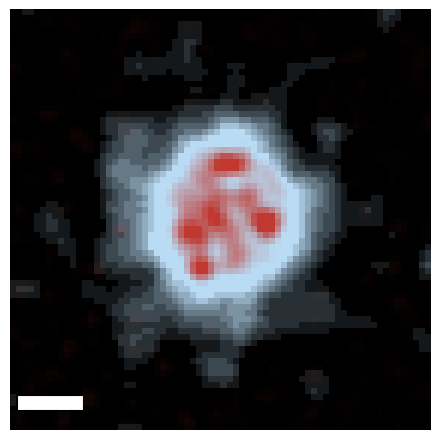

In [3]:
fname = "20220303-HILO_30ms-zoom-merge-1.tif"
raw_img_dual = imread(fname)
img_blue = gaussian_filter(raw_img_dual[1, :, :], 2)
img_red = raw_img_dual[0, :, :]
time_s = int(fname.split("merge-")[-1].split(".tif")[0]) * s_per_frame

plt.figure()
plt.imshow(
    img_blue,
    cmap=cmap_blue,
    vmin=np.percentile(img_blue.flat, 50),
    vmax=np.percentile(img_blue.flat, 90),
)
plt.imshow(
    img_red,
    cmap=cmap_red,
    vmin=np.percentile(img_red.flat, 50),
    vmax=np.percentile(img_red.flat, 99.5),
)
# plt.text(
#     0,
#     15,
#     str(round(time_s, 2)) + " s",
#     fontsize=80,
#     color="white",
# )
plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")

# plot scale bar
plt.plot(
    [
        2,
        2 + scalebar_length_pxl,
    ],
    [65, 65],
    "-",
    color=scalebar_color,
    lw=10,
)

plt.savefig(
    join(folder_save, "rotation_timelapse-start.png"),
    format="png",
    bbox_inches="tight",
    dpi=300,
    transparent=True,
)

### Other Frames, no scale bar

In [4]:
for fname in lst_imgs:
    raw_img_dual = imread(fname)
    img_blue = gaussian_filter(raw_img_dual[1, :, :], 2)
    img_red = raw_img_dual[0, :, :]
    time_s = int(fname.split("merge-")[-1].split(".tif")[0]) * s_per_frame

    plt.figure()
    plt.imshow(
        img_blue,
        cmap=cmap_blue,
        vmin=np.percentile(img_blue.flat, 50),
        vmax=np.percentile(img_blue.flat, 90),
    )
    plt.imshow(
        img_red,
        cmap=cmap_red,
        vmin=np.percentile(img_red.flat, 50),
        vmax=np.percentile(img_red.flat, 99.5),
    )
    # plt.text(
    #     0,
    #     15,
    #     str(round(time_s, 2)) + " s",
    #     fontsize=80,
    #     color="white",
    # )
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")

    plt.savefig(
        join(folder_save, "rotation_timelapse-" + str(round(time_s, 2)) + ".png"),
        format="png",
        bbox_inches="tight",
        dpi=300,
        transparent=True,
    )
    plt.close()